## Purpose : Backpropagation using numpy module

In [37]:
import numpy as np
import matplotlib.pyplot as plt


### Sigmoid function

In [38]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


### Hyper Parameter

In [39]:
epochs = 20000
learning_rate = 0.01

hidden_layer_size = 3


In [40]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Y = np.array([[0], [1], [1], [0]])

W_layer_1 = np.random.uniform(size=(X.shape[1], hidden_layer_size))
W_layer_2 = np.random.uniform(size=(hidden_layer_size, Y.shape[1]))

print(W_layer_1, end='\n\n')

print(W_layer_2, end='\n\n')


[[0.11808173 0.13391696 0.90191699]
 [0.15533031 0.66122366 0.26550327]]

[[0.71287649]
 [0.36797203]
 [0.16909786]]



In [42]:
error_list = []
for i in range(epochs):
    layer_1_output = sigmoid_function(np.dot(X, W_layer_1))
    layer_2_output = sigmoid_function(np.dot(layer_1_output, W_layer_2))
    
    E = 1 / 2 * np.square(Y - layer_2_output).sum()
    error_list.append(E)
    
    layer_2_W_grad = (Y - layer_2_output) * sigmoid_derivative(layer_2_output) 
    layer_1_W_grad = layer_2_W_grad.dot(W_layer_2.T) * sigmoid_derivative(layer_1_output) 
    
    W_layer_2 += learning_rate * np.dot(layer_1_output.T, layer_2_W_grad)
    W_layer_1 += learning_rate * np.dot(X.T, layer_1_W_grad)
    
    if i % 1000 == 0:
        print(E)


0.500060222639066


0.5000523923619509


0.5000450174255914


0.5000380398004334
0.5000314086075863


0.5000250790521371
0.5000190115331888
0.5000131708980668


0.5000075258145726
0.5000020482402334
0.4999967129715033


0.4999914972590611
0.4999863804778855
0.4999813438428318


0.49997637016206353
0.4999714436220175


0.49996654959865416
0.4999616744906057
0.4999568055705517


0.49995193085172474


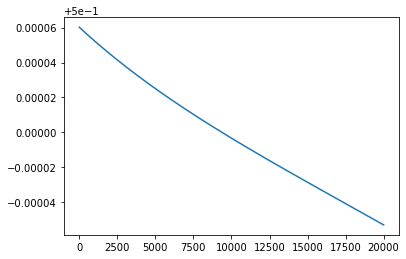

In [44]:
plt.plot(error_list)